# 监督模型

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

一.数据预处理

In [22]:
Data = pd.read_csv(r"C:/ML/creditcard.csv")
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


检查是否有缺失值

In [5]:
Data.isnull().any().sum()

0

利用heatmap来分析特征之间的相关度

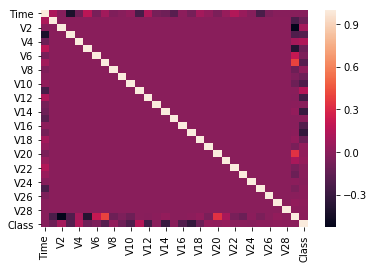

In [6]:
sns.heatmap(Data.corr())

总体来看V1-V28特征之间的相关度非常小，这可能是由于这些数据是由原始数据经过PCA处理导致的，相关度低的特征对于之后的训练模型比较有利

通过可视化样本的标签可以发现样本严重不平衡，符合现实的场景就是欺诈的数目只占样本的极小的一部分,样本如此偏斜的分布的处理十分关键

Text(0.5,1,'Class Distributions \n (0: Not Fraud  1: Fraud)')

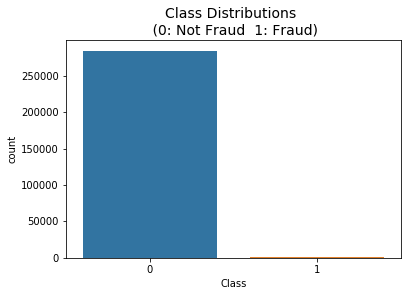

In [7]:
sns.countplot('Class', data=Data)
plt.title('Class Distributions \n (0: Not Fraud  1: Fraud)', fontsize=14)

可视化各个特征与样本是否属于欺诈样本的关系

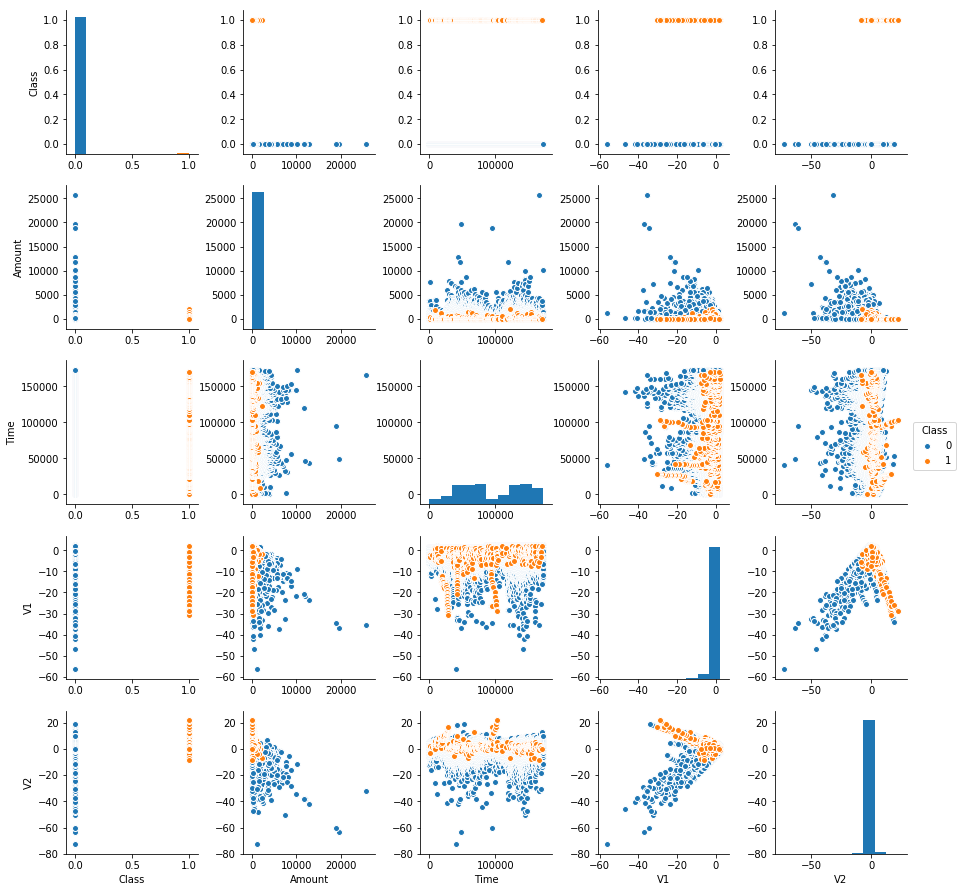

In [8]:
sns.pairplot(Data.loc[:, ['Class', 'Amount', 'Time', 'V1', 'V2']], hue='Class')

然后考察Amount，Time特征的偏斜程度。对于Amount，严重右偏，大多数情况下，交易总量会稳定在一个比较小的范围；对于Time特征可以发现，交易时间间隔存在着一些周期性。

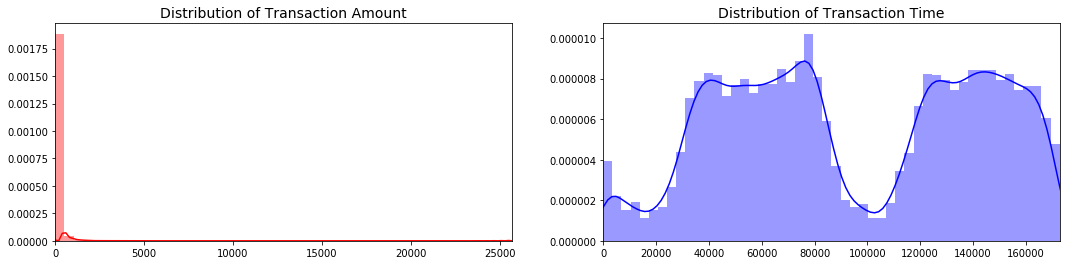

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = Data['Amount'].values
time_val = Data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

可视化一下正常样本与欺诈样本的交易时间，Amount分布的不同

Text(0.5,1,'Transaction time distribution - normal and fraud')

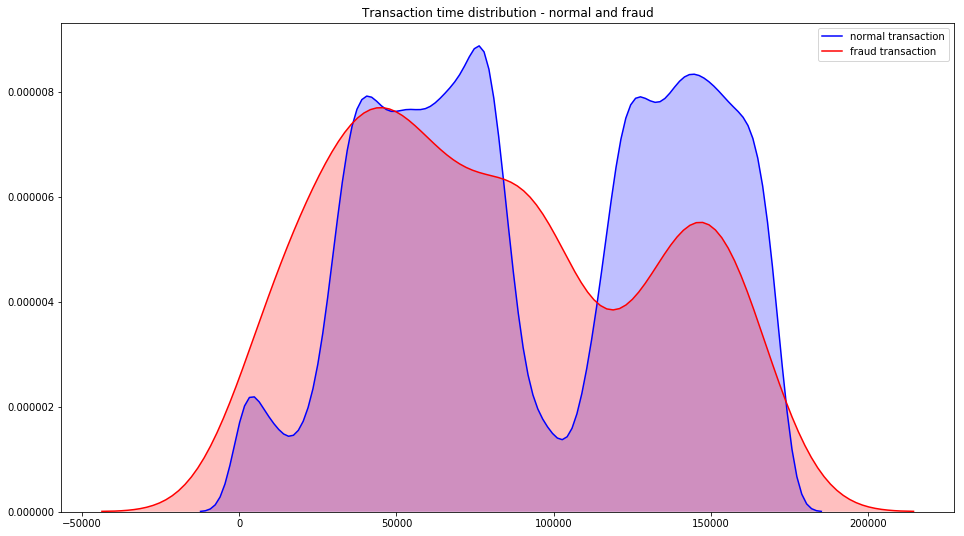

In [10]:
fig = plt.figure(figsize=(16,9),)
ax=sns.kdeplot(Data.loc[(Data['Class'] == 0), 'Time'] , color='b', shade=True,label='normal transaction')
ax=sns.kdeplot(Data.loc[(Data['Class'] == 1), 'Time'] , color='r', shade=True, label='fraud transaction')
plt.title('Transaction time distribution - normal and fraud')

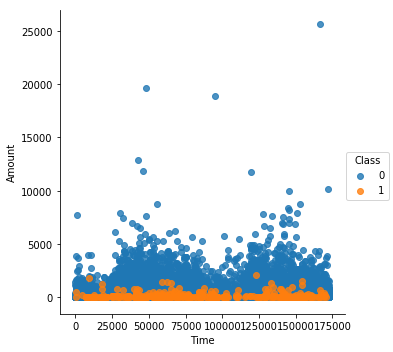

In [11]:
sns.lmplot(x='Time', y='Amount', data=Data,
           fit_reg=False, 
           hue='Class') 

对于Amount和Time特征，由于它们的范围与其他特征相差太大，需要对它们进行缩放，由于样本中的异常值（欺诈样本）十分重要，因此采用对数据的中心和范围更稳健估计的RobustScaler

In [27]:
from sklearn.preprocessing import StandardScaler, RobustScaler

rob_scaler = RobustScaler()

Data['scaled_amount'] = rob_scaler.fit_transform(Data['Amount'].reshape(-1,1))
Data['scaled_time'] = rob_scaler.fit_transform(Data['Time'].reshape(-1,1))

Data.drop(['Time','Amount'], axis=1, inplace=True)

C:\ana\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\ana\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


利用t-SNE降维之后，观察数据的分布

C:\ana\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


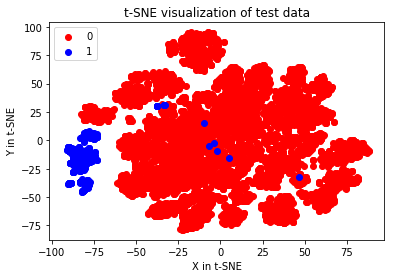

In [20]:
from sklearn.manifold import TSNE

Data2 = Data[Data.Class == 1]
Data2 = pd.concat([Data2, Data[Data.Class == 0].sample(n = 10000)], axis = 0)

y = Data2.ix[:,-1].values
tsne = TSNE(n_components=2, random_state=0)
x_2d = tsne.fit_transform(Data2)

color_map = {0:'red', 1:'blue'}
plt.figure(figsize=(16,9),)
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_2d[y==cl,0], 
                y = x_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of data')
plt.show()

利用统计学手段来分析欺诈样本Amount与总体样本Amount的关系，利用单样本t-检验，来检验欺诈样本的Amount的平均值与总体样本平均值是否显著不同

In [23]:
amount_population = Data.Amount.mean()
amount_fraud = Data[Data.Class == 1].Amount.mean()
print('mean amount of population: {}, mean amount of fraud transaction: {}'.format(amount_population, amount_fraud))


mean amount of population: 88.34961925087359, mean amount of fraud transaction: 122.21132113821133


In [24]:
import scipy.stats as stats
stats.ttest_1samp(a=Data[Data['Class']==1]['Amount'], popmean=amount_population)

Ttest_1sampResult(statistic=2.9261308240301198, pvalue=0.0035910854878476715)

In [25]:
degree_freedom = len(Data[Data['Class']==1])
conf_level = 0.95

LQ = stats.t.ppf((1-conf_level)/2,degree_freedom)  

RQ = stats.t.ppf((1+conf_level)/2,degree_freedom)  

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.96479735565
The t-distribution right quartile range is: 1.96479735565


结果显示，在0.05显著度下，由于t值在95%置信区间范围外，我们可以拒绝原假设，可以认为欺诈样本Amount平均值与总体Amount平均值显著不同。

为了得到一个更加平衡的数据集，将采用过采样的方试，使用了SMOTE算法。

二.训练模型

利用StratifiedShuffleSplit划分数据集，使得各个数据集的样本比例大致相同

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
X = Data.drop(['Class', 'scaled_time'], axis=1)
X = rob_scaler.fit_transform(X.values)
y = Data['Class'].values
for train_index, test_index in sss.split(X, y):
    X_train_ = X[train_index, :]
    y_train_ = y[train_index]
    X_test = X[test_index, :]
    y_test = y[test_index]

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold

def kfold_cv(Model, X, y, n_splits=10, smote=True, verbose=False):
    
    skf = StratifiedKFold(n_splits, random_state=5, shuffle=True)
    C = np.logspace(-3, 3, num=7, base=10)
    def sub_cv(model):
        kfold = skf.split(X, y)
        scores = 0
        recall = 0
        if smote:
            sme = SMOTEENN(random_state=5)
        i = 0
        for train_index, test_index in kfold:
            X_train_ = X[train_index, :]
            y_train_ = y[train_index]
            X_test = X[test_index, :]
            y_test = y[test_index]
            if smote:
                X_train, y_train = sme.fit_sample(X_train_, y_train_)
            else:
                X_train = X_train_
                y_train = y_train_
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_score = model.predict_proba(X_test)[:, 1]
            score = roc_auc_score(y_test, y_score, average='micro')
            if verbose:
                print('Trained {} th model, AUC score: {}'.format(i+1, score))
            scores += score
            recall += recall_score(y_test, y_pred)
            i += 1
        return scores / i, recall / i
    bestC = 0
    bestauc = 0
    bestrecall = 0
    for c in C:
        model = Model(class_weight='balanced', C=c)
        auc, recall = sub_cv(model)
        if recall > bestrecall:
            bestauc = auc
            bestC = c
            bestrecall = recall
        print('C: {}, AUC: {}, recall: {}, best C: {}'.format(c, auc, recall, bestC))
    return bestC, bestauc, bestrecall

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN 

Model = LogisticRegression
bestC, bestauc, bestrecall = kfold_cv(Model, X_train_, y_train_, n_splits=5, verbose=False)
print('Best C: {}'.format(bestC))


C: 0.001, AUC: 0.9787654633632332, recall: 0.8985069782538136, best C: 0.001
C: 0.01, AUC: 0.9785264739154946, recall: 0.9061019149626744, best C: 0.01
C: 0.1, AUC: 0.9784538325337623, recall: 0.911165206101915, best C: 0.1
C: 1.0, AUC: 0.978458451208998, recall: 0.911165206101915, best C: 0.1
C: 10.0, AUC: 0.9784563677942872, recall: 0.911165206101915, best C: 0.1
C: 100.0, AUC: 0.9784558266065467, recall: 0.911165206101915, best C: 0.1
C: 1000.0, AUC: 0.9784558280347648, recall: 0.911165206101915, best C: 0.1
Best C: 0.1


In [31]:
baseline = Model(class_weight='balanced', C=bestC)
baseline.fit(X_train_, y_train_)
y_pred = baseline.predict(X_test)
y_score = baseline.predict_proba(X_test)[:, 1] #
auc = roc_auc_score(y_test, y_score, average='micro')
recall = recall_score(y_test, y_pred)
print('AUC: {}, recall: {}'.format(auc, recall))

AUC: 0.9771366410942544, recall: 0.9081632653061225


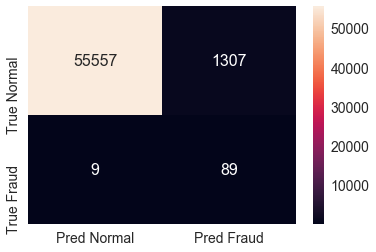

In [32]:
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])

sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

改进：
1.尝试Xgboost，lightgbm等树模型，模型调参
2.尝试半监督的方法，例如半监督SVM（TSVM）
3.基于现实，将问题转化为多分类问题，寻找欺诈样本中不同的模式
4.无监督学习：密度聚类，Isolation Forest，多元高斯分布
5.利用统计学方法分析欺诈样本的与正常样本有显著性差异的特征，并利用这些特征分析
6.尝试欠采样方法，利用Easy ensemble方法